In [3]:
# 1. Importer les librairies nécessaires
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
from google.cloud import storage

import requests
from PIL import Image
import numpy as np
from io import BytesIO

import cv2
import numpy as np
import requests
from io import BytesIO


2024-11-28 14:55:16.766254: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-28 14:55:16.778888: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 14:55:16.992093: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 14:55:17.161074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732802117.307081    2335 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732802117.35

In [6]:
df = pd.read_csv('data_train_set.csv')
df

,file_name,name,name_readable
0,131094.jpg,soft-cheese,Soft cheese
1,131094.jpg,ham-raw,"Ham, raw"
2,131094.jpg,hard-cheese,Hard cheese
3,131094.jpg,bread-wholemeal,"Bread, wholemeal"
4,131094.jpg,cottage-cheese,Cottage cheese
...,...,...,...
70392,131053.jpg,dairy-ice-cream,Dairy ice cream
70393,131066.jpg,coffee-with-caffeine,"Coffee, with caffeine"
70394,131071.jpg,bread-wholemeal,"Bread, wholemeal"
70395,131071.jpg,butter,Butter


In [26]:
df_select = df.groupby(['name']).count().sort_values(by='file_name', ascending=False)
df_select.head(20)

,file_name,name_readable
name,,
water,2928,2928
salad-leaf-salad-green,2002,2002
bread-white,1891,1891
tomato-raw,1865,1865
butter,1601,1601
carrot-raw,1482,1482
bread-wholemeal,1452,1452
coffee-with-caffeine,1406,1406
rice,1024,1024


In [29]:
df_sample = df['file_name']
df_sample

0        131094.jpg
1        131094.jpg
2        131094.jpg
3        131094.jpg
4        131094.jpg
            ...    
70392    131053.jpg
70393    131066.jpg
70394    131071.jpg
70395    131071.jpg
70396    131071.jpg
Name: file_name, Length: 70397, dtype: object

In [ ]:
# Assignement des folders pour télécharger les images

from google.cloud import storage

BUCKET_NAME = "foodbuddy-dataset"
REMOTE_PATH = "public_training_set_release_2.0/images/"
LOCAL_DIRECTORY = "images_sample/"

In [8]:
# On s'assure que le répertoire local existe
os.makedirs(LOCAL_DIRECTORY, exist_ok=True)

In [9]:
# Accès au Gcloud avec credentials
client = storage.Client()
bucket = client.bucket(BUCKET_NAME)

In [8]:
#Boucle de téléchargement des images
for file_name in df_sample['file_name']:
    storage_filename = f"{REMOTE_PATH}{file_name}"
    local_filename = os.path.join(LOCAL_DIRECTORY, file_name)
    blob = bucket.blob(storage_filename)
    blob.download_to_filename(local_filename)
    print(f"Téléchargé : {file_name}")

Téléchargé : 006316.jpg
Téléchargé : 006458.jpg
Téléchargé : 006493.jpg
Téléchargé : 006508.jpg
Téléchargé : 006615.jpg
Téléchargé : 007055.jpg
Téléchargé : 007203.jpg
Téléchargé : 007315.jpg
Téléchargé : 007394.jpg
Téléchargé : 007460.jpg
Téléchargé : 007476.jpg
Téléchargé : 007528.jpg
Téléchargé : 007588.jpg
Téléchargé : 007595.jpg
Téléchargé : 007608.jpg
Téléchargé : 007620.jpg
Téléchargé : 007640.jpg
Téléchargé : 007659.jpg
Téléchargé : 007679.jpg
Téléchargé : 007721.jpg
Téléchargé : 007760.jpg
Téléchargé : 007799.jpg
Téléchargé : 007811.jpg
Téléchargé : 007824.jpg
Téléchargé : 007825.jpg
Téléchargé : 007829.jpg
Téléchargé : 007854.jpg
Téléchargé : 007878.jpg
Téléchargé : 007921.jpg
Téléchargé : 007934.jpg
Téléchargé : 008006.jpg
Téléchargé : 008053.jpg
Téléchargé : 008072.jpg
Téléchargé : 008076.jpg
Téléchargé : 008104.jpg
Téléchargé : 008150.jpg
Téléchargé : 008179.jpg
Téléchargé : 008203.jpg
Téléchargé : 008205.jpg
Téléchargé : 008210.jpg
Téléchargé : 008213.jpg
Téléchargé : 008

In [10]:
# Vérifier le DataFrame existant
df_sample

,file_name,name,nbr_ingredient
0,006316.jpg,cake-chocolate,1
1,006458.jpg,pear,1
2,006493.jpg,apple,1
3,006508.jpg,salad-leaf-salad-green,1
4,006615.jpg,apple,1
...,...,...,...
3620,185123.jpg,beer,1
3621,185136.jpg,salad-leaf-salad-green,1
3622,185351.jpg,apple,1
3623,185366.jpg,apple,1


In [11]:
# Associer les chemins des images téléchargées à leurs tags avec un local path
df_sample['local_path'] = df_sample['file_name'].apply(lambda x: os.path.join(LOCAL_DIRECTORY, x))


In [12]:
df_sample

,file_name,name,nbr_ingredient,local_path
0,006316.jpg,cake-chocolate,1,images_sample/006316.jpg
1,006458.jpg,pear,1,images_sample/006458.jpg
2,006493.jpg,apple,1,images_sample/006493.jpg
3,006508.jpg,salad-leaf-salad-green,1,images_sample/006508.jpg
4,006615.jpg,apple,1,images_sample/006615.jpg
...,...,...,...,...
3620,185123.jpg,beer,1,images_sample/185123.jpg
3621,185136.jpg,salad-leaf-salad-green,1,images_sample/185136.jpg
3622,185351.jpg,apple,1,images_sample/185351.jpg
3623,185366.jpg,apple,1,images_sample/185366.jpg


In [13]:
# Exemple de transformation en dictionnaire si nécessaire
image_to_name = df_sample.set_index('local_path')['name'].to_dict()


In [14]:
# Exemple d'accès à un tag pour une image
for path, name in image_to_name.items():
    print(f"Image: {path}, Name: {name}")

Image: images_sample/006316.jpg, Name: cake-chocolate
Image: images_sample/006458.jpg, Name: pear
Image: images_sample/006493.jpg, Name: apple
Image: images_sample/006508.jpg, Name: salad-leaf-salad-green
Image: images_sample/006615.jpg, Name: apple
Image: images_sample/007055.jpg, Name: cake-chocolate
Image: images_sample/007203.jpg, Name: apple
Image: images_sample/007315.jpg, Name: bread-wholemeal
Image: images_sample/007394.jpg, Name: bread-wholemeal
Image: images_sample/007460.jpg, Name: mandarine
Image: images_sample/007476.jpg, Name: pear
Image: images_sample/007528.jpg, Name: beer
Image: images_sample/007588.jpg, Name: apple
Image: images_sample/007595.jpg, Name: salad-leaf-salad-green
Image: images_sample/007608.jpg, Name: pear
Image: images_sample/007620.jpg, Name: beer
Image: images_sample/007640.jpg, Name: apple
Image: images_sample/007659.jpg, Name: mandarine
Image: images_sample/007679.jpg, Name: mixed-nuts
Image: images_sample/007721.jpg, Name: bread-whole-wheat
Image: i

In [15]:
# Définir le X

import os
import numpy as np
from PIL import Image

# Dimensions souhaitées pour les images
image_size = (128, 128)

# Liste pour stocker les images
images_array = []

# Charger et redimensionner les images
for file_name in os.listdir(LOCAL_DIRECTORY):
    if file_name.endswith('.jpg'):
        file_path = os.path.join(LOCAL_DIRECTORY, file_name)
        try:
            # Ouvrir l'image, redimensionner et convertir en tableau numpy
            img = Image.open(file_path).convert("RGB")
            img = img.resize(image_size)
            img_array = np.array(img)
            images_array.append(img_array)
        except Exception as e:
            print(f"Erreur avec l'image {file_name}: {e}")

# Convertir la liste en un tableau numpy
X = np.array(images_array, dtype="float32") / 255.0  # Normalisation entre 0 et 1

print(f"Tableau des images chargé : {X.shape}")

Tableau des images chargé : (3625, 128, 128, 3)


In [ ]:
import tensorflow as tf

# Dimensions cibles pour le padding
target_height = 128
target_width = 128

# Fonction de padding
def pad_images(images, target_height, target_width):
    padded_images = [
        tf.image.resize_with_pad(image, target_height, target_width).numpy()
        for image in images
    ]
    return tf.convert_to_tensor(padded_images)

# Application du padding sur le dataset X
X_padded = pad_images(X, target_height, target_width)

2024-11-27 11:45:47.754910: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
# Conversion de X_padded en tableau NumPy
X_padded_np = X_padded.numpy() if isinstance(X_padded, tf.Tensor) else np.array(X_padded)

In [18]:
# Définir le y
y = df_sample['name']

# Faire le test train split des données
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded_np, y, test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2900, 128, 128, 3), (725, 128, 128, 3), (2900,), (725,))

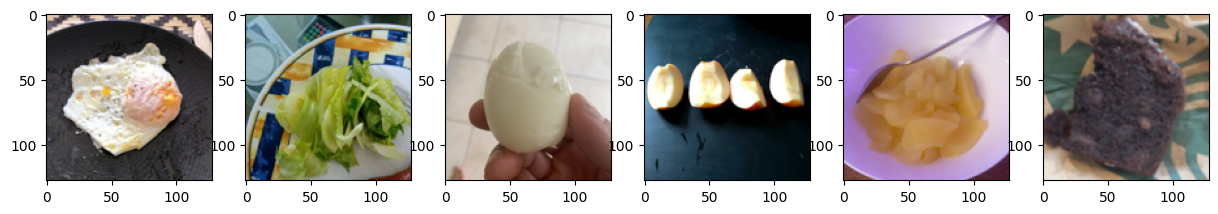

In [19]:
# Visualiation des images
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = X[i]
    label = y[i][0]
    plt.imshow(img)

In [ ]:
# Preprocessing

### Normalizing pixels' intensities
X_train = X_train / 255.
X_test = X_test / 255.


In [32]:
X_train

array([[[[1.5378702e-05, 1.5378702e-05, 1.5378702e-05],
         [1.5378702e-05, 1.5378702e-05, 1.5378702e-05],
         [3.0757405e-05, 3.0757405e-05, 3.0757405e-05],
         ...,
         [5.9976935e-04, 3.0757402e-04, 9.2272203e-05],
         [6.4590544e-04, 3.5371011e-04, 1.3840832e-04],
         [6.4590544e-04, 3.5371011e-04, 1.3840832e-04]],

        [[1.5378702e-05, 1.5378702e-05, 1.5378702e-05],
         [1.5378702e-05, 1.5378702e-05, 1.5378702e-05],
         [1.5378702e-05, 1.5378702e-05, 1.5378702e-05],
         ...,
         [5.6901196e-04, 2.7681663e-04, 6.1514809e-05],
         [5.9976935e-04, 3.0757402e-04, 9.2272203e-05],
         [6.4590544e-04, 3.5371011e-04, 1.3840832e-04]],

        [[1.5378702e-05, 1.5378702e-05, 1.5378702e-05],
         [1.5378702e-05, 1.5378702e-05, 1.5378702e-05],
         [1.5378702e-05, 1.5378702e-05, 1.5378702e-05],
         ...,
         [5.6901196e-04, 2.7681663e-04, 6.1514809e-05],
         [5.9976935e-04, 3.0757402e-04, 9.2272203e-05],
  

In [22]:
y_train

236            bread-wholemeal
1621                carrot-raw
2471                carrot-raw
2363                mixed-nuts
2143                     apple
                 ...          
1835                     apple
1488    salad-leaf-salad-green
856                 tomato-raw
3221    salad-leaf-salad-green
321                       pear
Name: name, Length: 2900, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [24]:
# Convert integer labels to one-hot encoded vectors
y_train_one_hot = to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_test_one_hot = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

In [25]:
y_train_one_hot


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Creation of CNN model

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def initialize_model():
    model = Sequential()

    # Couche d'entrée et première couche convolutive
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
    #Add maxpull

    # Deuxième couche convolutive
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))  # kernel_size spécifié correctement
    #Add maxpull

    # Aplatissement des caractéristiques
    model.add(Flatten())

    # Couche dense avec activation sigmoid
    model.add(Dense(1, activation='sigmoid'))

    return model

# Initialiser et afficher le modèle
model = initialize_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 124, 124, 4)    │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        61,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,893 (241.77 KB)

 Trainable params: 61,893 (241.77 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Fonction pour compiler le modèle
def compile_model(model):
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Ajustez selon vos labels (si one-hot, utilisez 'categorical_crossentropy')
        metrics=['accuracy']
    )
    return model

In [33]:
# Initialiser et compiler le modèle
model = initialize_model()
model = compile_model(model)

In [34]:
# Optimize model
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    return model

In [35]:
# Define early stopping
initialize_model()

from tensorflow.keras.callbacks import EarlyStopping


model = compile_model(model)

es = EarlyStopping(patience = 5, verbose = 2)

history = model.fit(X_train, y_train,
                    validation_split = 0.3,
                    callbacks = [es],
                    epochs = 100,
                    batch_size = 64)

Epoch 1/100


/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
2024-11-27 11:54:57.436830: W tensorflow/core/framework/op_kernel.cc:1818] OP_REQUIRES failed at cast_op.cc:122 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node compile_loss/categorical_crossentropy/Cast defined at (most recent call last):
  File "/home/victor/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/victor/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/victor/.pyenv/versions/3.10.6/lib/python3.10/asyncio/base_events.py", line 600, in run_forever

  File "/home/victor/.pyenv/versions/3.10.6/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once

  File "/home/victor/.pyenv/versions/3.10.6/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_20845/1419092703.py", line 11, in <module>

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/trainers/trainer.py", line 398, in _compute_loss

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/trainers/trainer.py", line 366, in compute_loss

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 618, in __call__

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 659, in call

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/losses/loss.py", line 56, in __call__

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/tree/tree_api.py", line 148, in map_structure

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/tree/optree_impl.py", line 79, in map_structure

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/optree/ops.py", line 752, in tree_map

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/losses/loss.py", line 57, in <lambda>

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/ops/core.py", line 917, in convert_to_tensor

  File "/home/victor/.pyenv/versions/3.10.6/envs/foodbuddy/lib/python3.10/site-packages/keras/src/backend/tensorflow/core.py", line 132, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/categorical_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_222696]

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
plot_history(history)
plt.show()

In [ ]:
res = model.evaluate(X_test, y_test, verbose = 0)

print(f'The accuracy is {res[1]*100:.1f}% compared to a chance level of {1./len(labels)*100}%')

In [ ]:
# Data augmentation - if necessary????? Implies to run a new model + new test